___
# <center>**Introduction**</center>
___
*In this comprehensive analysis, we delve into the performance and dynamics of a company over a four-year period, from 2012 to 2015. This analysis encompasses various key aspects of the company's operations, including sales, profitability, marketing expenditures, and market segmentation. By examining these critical factors, we aim to uncover valuable insights that can guide strategic decision-making and shed light on the company's performance over the years.*
*The analysis begins with a deep exploration of the company's sales trends.*
- **Objective of the Analysis:**

The primary objective of this analysis is to provide a comprehensive and data-driven understanding of the company's performance over a four-year period (2012-2015).
___

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression

--- ---
# 1. Descriptive analysis
--- ---
### 1.1. Loading the data
---

In [2]:
data = pd.read_csv('data/Coffee_Chain_Sales .csv')

--- 
### 1.2. Global overview of the data
---

In [3]:
print('Shape of the dataset (rows, columns) is ' + str(data.shape))
print('Number of missing values ' + str(data.isna().sum().sum()))
print('Number of duplicates ' + str(data.duplicated().sum()))

Shape of the dataset (rows, columns) is (1062, 21)
Number of missing values 0
Number of duplicates 0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area Code                               1062 non-null   int64 
 1   Cogs                                    1062 non-null   int64 
 2   DifferenceBetweenActualandTargetProfit  1062 non-null   int64 
 3   Date                                    1062 non-null   object
 4   Inventory Margin                        1062 non-null   int64 
 5   Margin                                  1062 non-null   int64 
 6   Market_size                             1062 non-null   object
 7   Market                                  1062 non-null   object
 8   Marketing                               1062 non-null   int64 
 9   Product_line                            1062 non-null   object
 10  Product_type                            1062 non-null   object
 11  Prod

___
- There are 1,062 rows and 21 columns in the dataset. There are no missing values or duplicates.
- There are 13 integer types and 8 categorical types, but 'date' was mistakenly categorized as a categorical variable.
___

# 2. Data Cleaning
___
### 2.1 Tranforming 'Date' into datetime and creating 'Year' and 'Month'
___

In [5]:
data['Date'] = pd.to_datetime(data.Date)
# Create separate 'Year' and 'Month' columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

___
# 3. EDA 
___
### 3.1. Evolution of Sales through the years
___

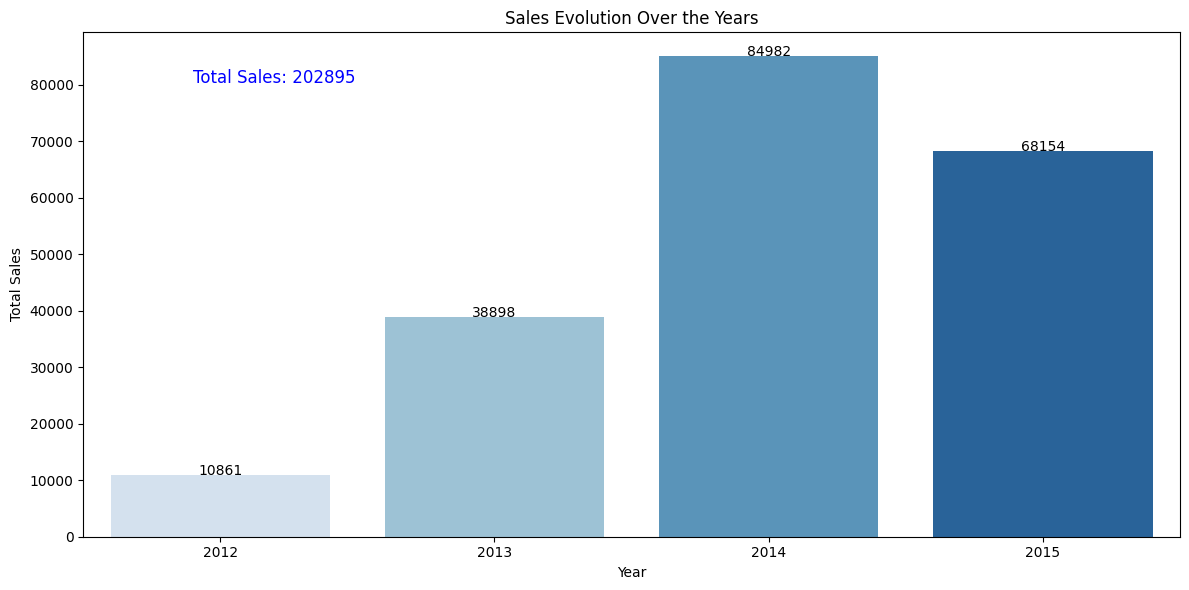

In [6]:
sales_by_years = data.groupby('Year').Sales.sum().reset_index()
total_sales = data['Sales'].sum()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sales_by_years, x='Year', y='Sales', palette='Blues')

for i, p in enumerate(ax.patches):
    percentage = f'{p.get_height():.0f}'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.text(0.1, 0.9, f'Total Sales: {total_sales:.0f}', 
         transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.title("Sales Evolution Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")

plt.tight_layout()
plt.show()

___
### 3.2. Evolution of Sales through Months
___

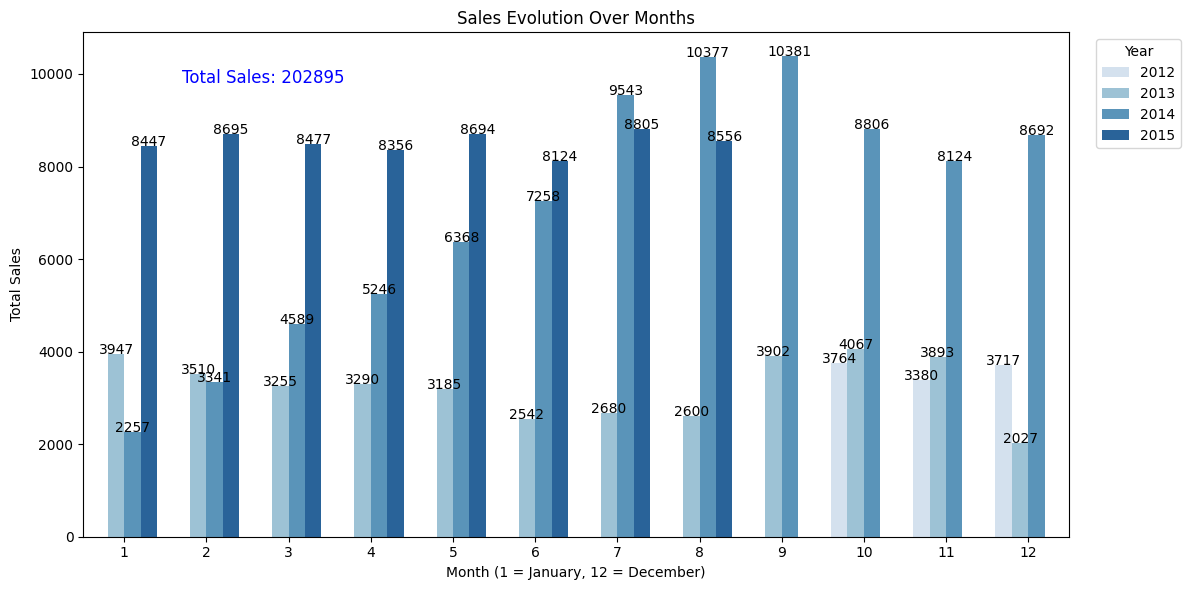

In [7]:
sales_by_month = data.groupby(['Year', 'Month']).Sales.sum().reset_index()
total_sales = data['Sales'].sum()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sales_by_month, x='Month', y='Sales', palette='Blues', hue='Year')

for i, p in enumerate(ax.patches):
    percentage = f'{p.get_height():.0f}'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.text(0.1, 0.9, f'Total Sales: {total_sales:.0f}', 
         transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.title("Sales Evolution Over Months")
plt.xlabel("Month (1 = January, 12 = December)")
plt.ylabel("Total Sales")
ax.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

___
- The total sales for the period under analysis amounted to 202,895 units. Over the years, sales displayed an upward trend, with the highest sales occurring in 2014, totaling 84,982 units, followed closely by 2015, which recorded 68,154 units in sales.
- In 2012, data is available for only the last three months of the year (October, November, and December). Among these, October stands out with the highest sales, reaching 3,764 units.
- In 2013, data is available for all twelve months, with October once again leading in sales at 4,067 units, while December had the lowest sales at 2,027 units.
- In 2014, the sales trajectory exhibited noticeable fluctuations by month, with peaks in August and September, both exceeding 10,000 units (10,377 and 10,381, respectively). Conversely, January of that year recorded the lowest sales, totaling 2,257 units.
- By 2015, sales data is available from January to August, with each month maintaining a relatively stable trend. July secured the highest sales for that year, amounting to 8,805 units.
___

### 3.3 Sales by Product Type and by Product
___

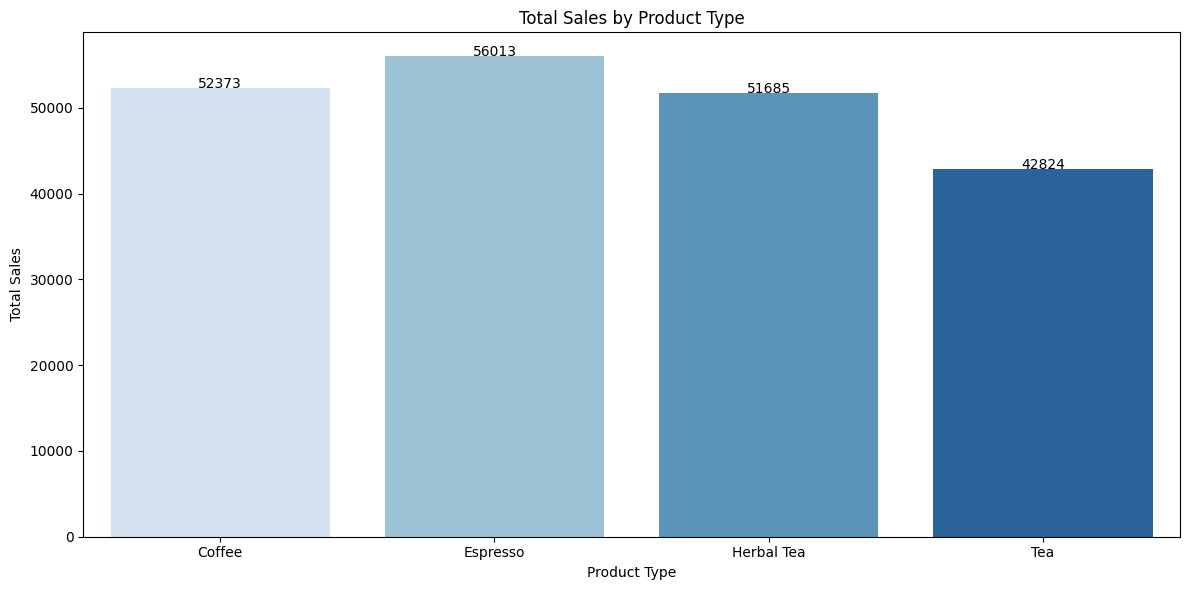

In [8]:
sales_by_product_type = data.groupby('Product_type').Sales.sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sales_by_product_type, x='Product_type', y='Sales', palette='Blues')

for i, p in enumerate(ax.patches):
    percentage = f'{p.get_height():.0f}'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.title("Total Sales by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

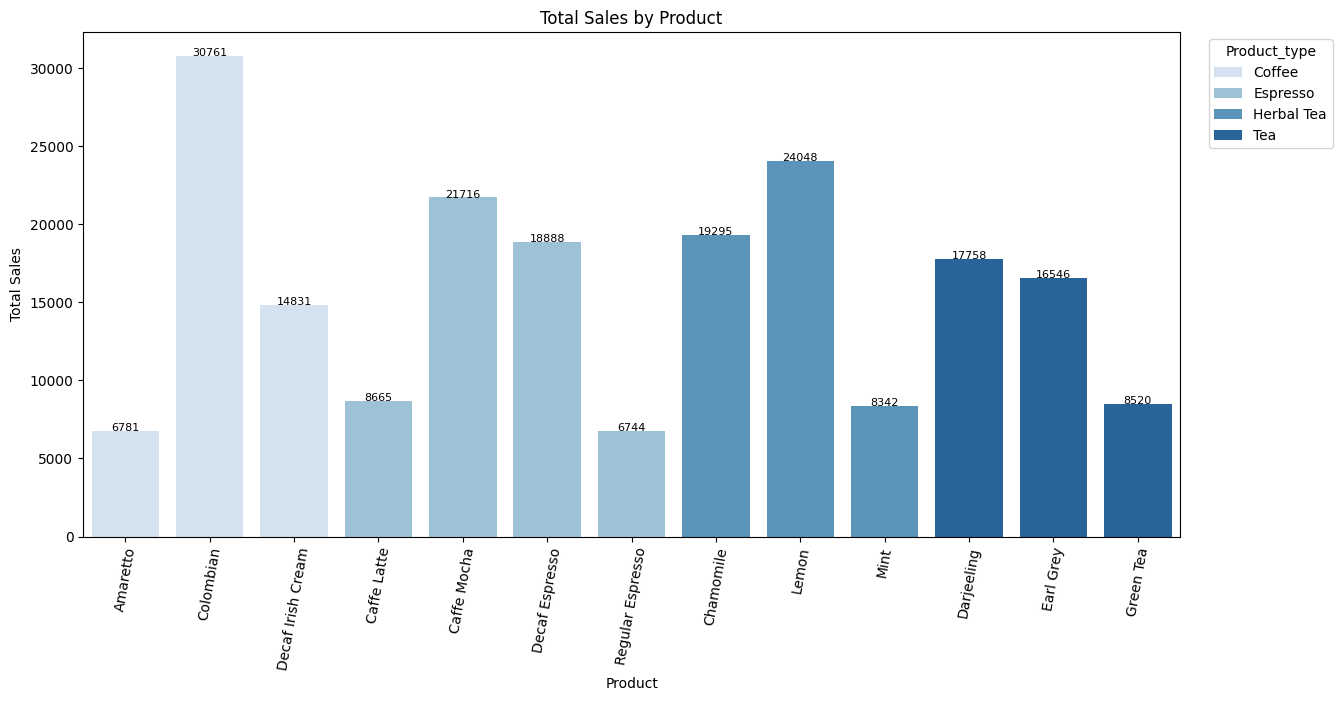

In [9]:
# Sales by product
sale_by_product_by_productType = data.groupby(['Product_type', 'Product']).Sales.sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sale_by_product_by_productType, x='Product', y='Sales', hue='Product_type', palette='Blues', dodge=False)

for i, p in enumerate(ax.patches):
    percentage = f'{p.get_height():.0f}'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2. , p.get_height()), ha='center', va='baseline', fontsize=8, color='black')

plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.xticks(rotation=80)
ax.legend(title='Product_type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

___
- Product Type Categories:

    - Coffee: Total sales for Coffee products: 52,373 units.
    - Espresso: Total sales for Espresso products: 56,013 units.
    - Herbal Tea: Total sales for Herbal Tea products: 51,683 units.
    - Tea: Total sales for Tea products: 42,824 units.

- Espresso Category:

    - Within the Espresso category, there are four product options: Caffe Latte, Caffe Mocha, Decaf Espresso, and Regular Espresso.
    - The two most popular products in this category are Caffe Mocha (21,716 sales) and Decaf Espresso (18,888 sales).
- Coffee Category:

    - In the Coffee category, three product options are available: Amaretto, Colombian, and Decaf Irish Cream.
    - The most popular products in this category are Colombian (30,761 sales) and Decaf Irish Cream (14,831 sales).
- Herbal Tea Category:

    - The Herbal Tea category features three product options: Chamomile, Lemon, and Mint.
    - Lemon (24,048 sales) and Chamomile (19,295 sales) are the most popular products in this category.
- Tea Category:

    - The Tea category includes three product options: Darjeeling, Earl Grey, and Green Tea.
    - The most popular products in this category are Darjeeling (17,758 sales) and Earl Grey (16,546 sales).

- Overall Analysis:

    - Espresso is the category with the highest total sales (56,013 units), closely followed by Coffee (52,373 units), Herbal Tea (51,683 units), and Tea (42,824 units).
    - Among the product options in each category, Caffe Mocha and Decaf Espresso stand out in the Espresso category, Colombian and Decaf Irish Cream lead in the Coffee category, Lemon and Chamomile are the top choices in the Herbal Tea category, and Darjeeling and Earl Grey are the favored options in the Tea category.
    - It's worth noting that Colombian remains the most popular product overall, with the highest sales across all categories.

- Key Insights:

    - Espresso and Coffee are the top-selling categories, indicating a strong demand for caffeinated beverages.
    - Understanding the most popular products within each category can guide marketing and inventory decisions.
    - Lemon appears to be a popular choice, and Chamomile is also performing well, suggesting a preference for herbal teas.
    - Recognizing Colombian as the consistently popular product highlights the importance of catering to customer preferences and ensuring its availability.
___

### 3.4. Sales by Market size and Market
---

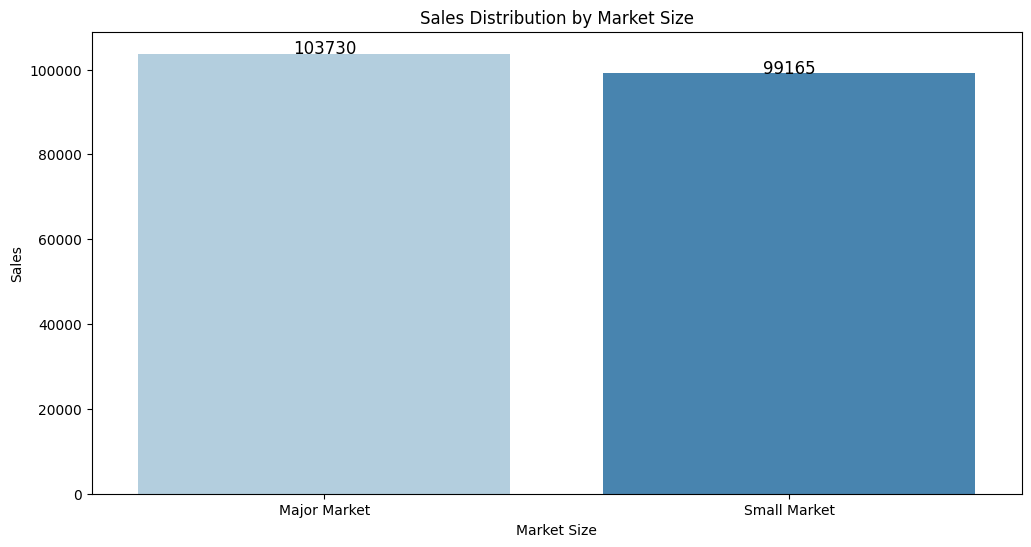

In [10]:
# Sales distribution by market size
total_sales_by_market_size = data.groupby('Market_size')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_sales_by_market_size, x="Market_size", y="Sales", palette='Blues')
for i, p in enumerate(ax.patches):
    sales = f'{p.get_height():.0f}'
    ax.annotate(sales, (p.get_x() + p.get_width() / 2. , p.get_height()), ha='center', va='baseline', fontsize=12, color='black')

plt.title("Sales Distribution by Market Size")
plt.xlabel("Market Size")
plt.ylabel("Sales")
plt.show()

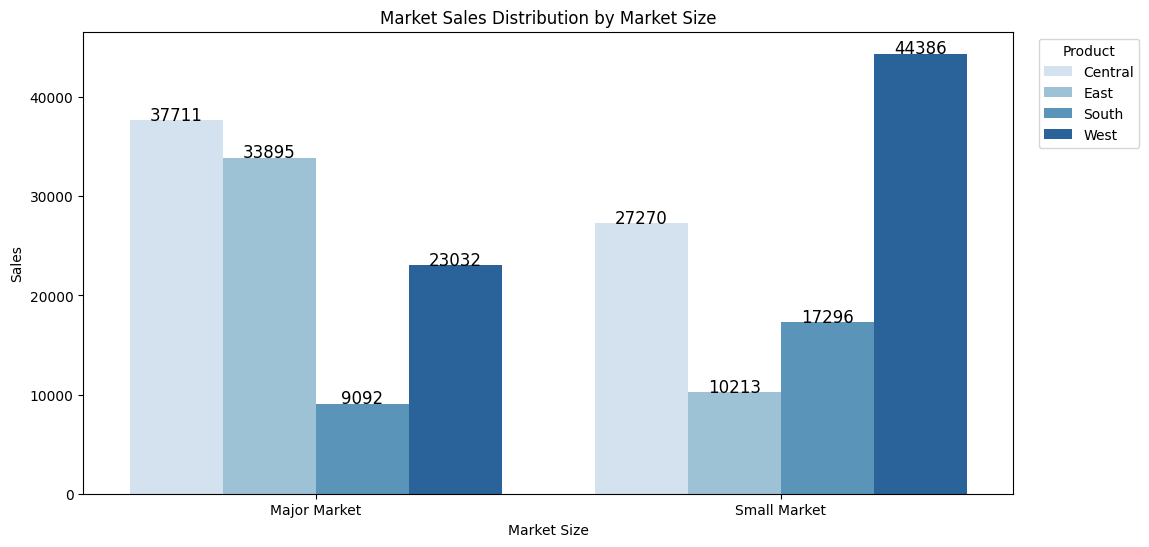

In [46]:
# Market Sales distribution by market size
total_sales_by_market_size = data.groupby(['Market_size', 'Market'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_sales_by_market_size, x="Market_size", y="Sales", palette='Blues', hue='Market')
for i, p in enumerate(ax.patches):
    sales = f'{p.get_height():.0f}'
    ax.annotate(sales, (p.get_x() + p.get_width() / 2. , p.get_height()), ha='center', va='baseline', fontsize=12, color='black')

ax.legend(title='Product', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Market Sales Distribution by Market Size")
plt.xlabel("Market Size")
plt.ylabel("Sales")
plt.show()

In [12]:
# Sales distribution in small market
small_market = data[data['Market_size'] == 'Small Market']
small_market_summary = small_market.groupby(['State', 'Product', 'Market']).Sales.sum().reset_index()

fig = px.bar(small_market_summary, x='State', y='Sales', color='Product', 
             title='Total Sales by Product in Each State (Small Market)', 
             labels={'State': 'State', 'Sales': 'Total Sales'},
             color_discrete_sequence=px.colors.qualitative.Set3,
             facet_col='Market')

fig.update_xaxes(categoryorder='array')
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Total Sales')
fig.update_layout(legend_title_text='Product', xaxis_tickangle=-45)

fig.show()

In [13]:
# Sales distribution in major market
major_market = data[data['Market_size'] == 'Major Market']
major_market_summary = major_market.groupby(['State', 'Product', 'Market']).Sales.sum().reset_index()

fig = px.bar(major_market_summary, x='State', y='Sales', color='Product', 
             title='Total Sales by Product in Each State (Major Market)', 
             labels={'State': 'State', 'Sales': 'Total Sales'},
             color_discrete_sequence=px.colors.qualitative.Set3,
             facet_col='Market')

fig.update_xaxes(categoryorder='array')
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Total Sales')
fig.update_layout(legend_title_text='Product', xaxis_tickangle=-45)

fig.show()

___
- **Market Size Analysis:**

    - Market Size Composition: The market size is divided into two categories: Major and Small markets.
    - Major Market Sales: The Major Market accounts for a higher total sales of 103,730 units.
    - Small Market Sales: The Small Market also performs well with total sales of 99,165 units.

- **Market Segment Analysis:**
    - Market Segments: Within each market size, the markets are further divided into four segments: Central, East, South, and West.

- **Small Market Analysis:**
    - Sales in the Small Market: Among the Small Market segments, the West market leads with significant sales of 44,386 units. It is followed by Central (27,270 units), South (17,296 units), and East (10,213 units).

- ***Small Market Product Preference: In the Small Market, the state of Nevada stands out with the highest product sales. Customers in this region show a preference for product types such as Tea and Herbal Tea. Darjeeling, Earl Grey, Lemon, Chamomile, and Mint are the most popular products, suggesting a demand for these varieties.***

- **Major Market Analysis:**
    - Sales in the Major Market: Within the Major Market, Central and East markets lead with the highest sales, recording 37,711 and 33,895 units, respectively. The West and South markets also contribute with 23,032 and 9,092 unit sales, respectively.

- ***Major Market Product Preference: California is the predominant state in the Major Market. Customers in this region exhibit a preference for product types like Coffee, Espresso, and Herbal Tea. Colombian, Decaf Espresso, Lemon, and Caffe Latte are the top-selling products.***

- *Overall Insights:*

    - Both the Major and Small markets contribute significantly to the overall sales, with the Major Market slightly outperforming the Small Market.
    - The choice of market segments within each market size significantly impacts sales. For instance, the West market in the Small Market and Central and East markets in the Major Market lead in sales.
    - Customer preferences for specific product types vary by region, with Tea and Herbal Tea being popular in the Small Market and Coffee, Espresso, and Herbal Tea in the Major Market.
    - Understanding regional preferences can guide marketing and inventory decisions to meet customer demands effectively.
___

### 4.1. Evolution of Profit through the years
___

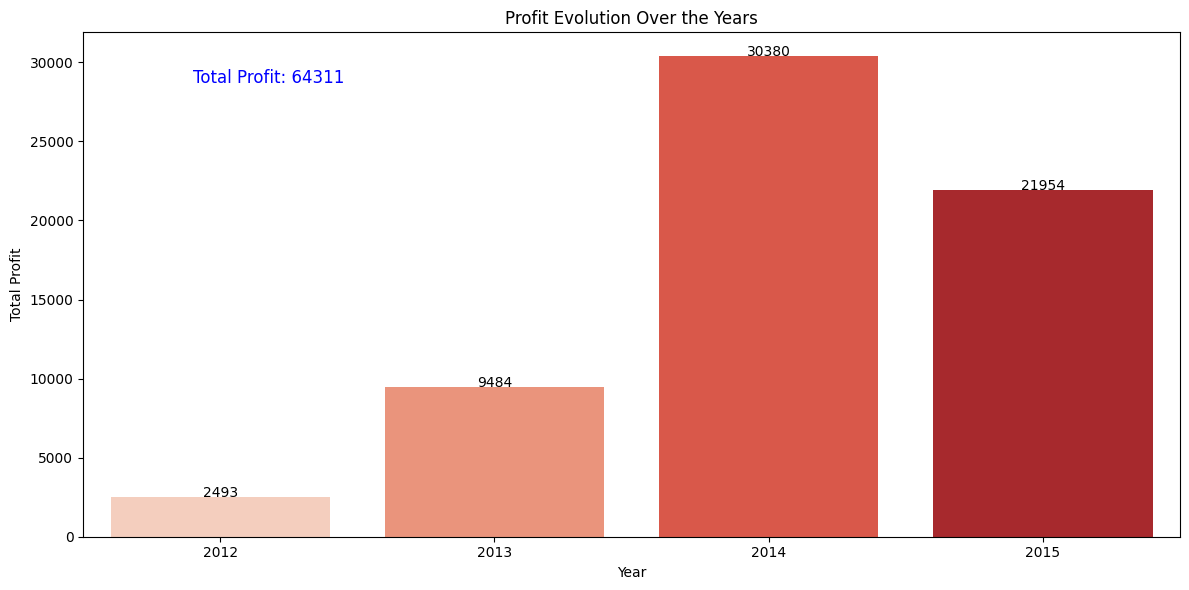

In [14]:
profit_by_years = data.groupby('Year').Profit.sum().reset_index()
total_prift = data['Profit'].sum()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=profit_by_years, x='Year', y='Profit', palette='Reds')

for i, p in enumerate(ax.patches):
    profit = f'{p.get_height():.0f}'
    ax.annotate(profit, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.text(0.1, 0.9, f'Total Profit: {total_prift:.0f}', 
         transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.title("Profit Evolution Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Profit")

plt.tight_layout()
plt.show()

___
### 4.2. Evolution of Profit through Months
___

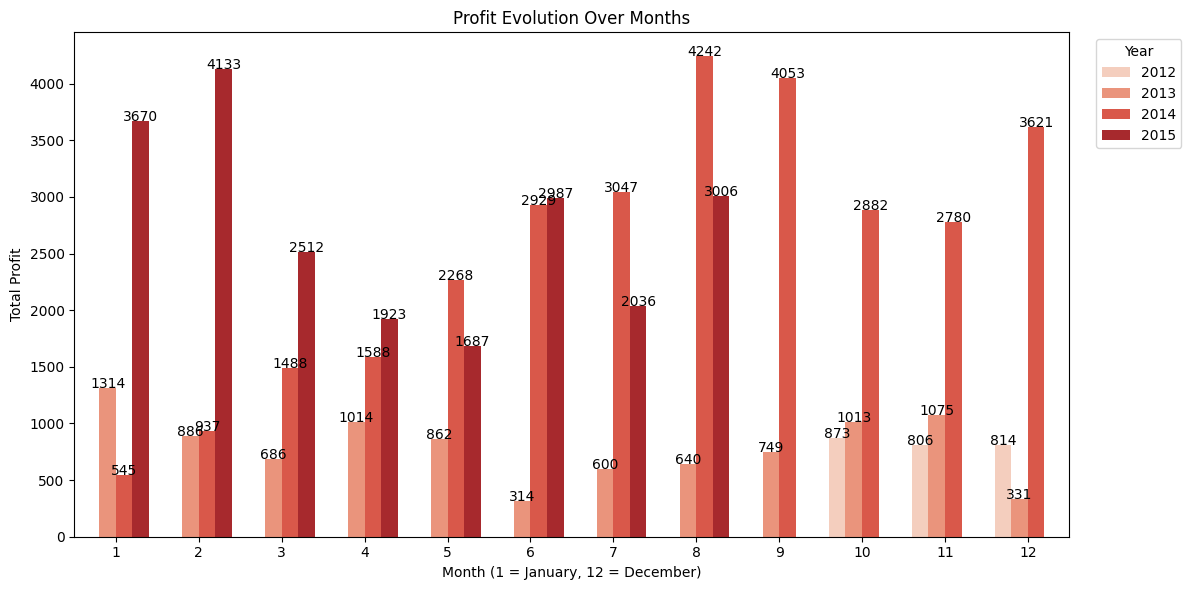

In [15]:
profit_by_month = data.groupby(['Year', 'Month']).Profit.sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=profit_by_month, x='Month', y='Profit', palette='Reds', hue='Year')

for i, p in enumerate(ax.patches):
    percentage = f'{p.get_height():.0f}'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.title("Profit Evolution Over Months")
plt.xlabel("Month (1 = January, 12 = December)")
plt.ylabel("Total Profit")
ax.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

___
- **Yearly Profit Analysis:**

    - Total Profit: The total profit for the period under analysis was $64,311.
    - Most Profitable Years: The years 2014 and 2015 were the most profitable, with profits of $30,380 and $21,954, respectively. These years stand out as the highest-grossing periods.

- **Monthly Profit Analysis:**

    - 2012:
        - In 2012, the analysis only covers the months from 10 to 12.
        - October (Month 10): This month had the highest profit of $873.
        - November (Month 11): November recorded the lowest profit for the period at $806.

    - 2013:
        - In 2013, the highest profit was observed in January (Month 1) with a profit of $1,314.
        - June (Month 6) had the lowest profit for the year, totaling $314.
    - 2014:
        - The year 2014 exhibited several months with significant profits, with the highest profits in the latter half of the year.

        - August (Month 8): Recorded the highest monthly profit of $4,242.
        - September (Month 9): Also had substantial profits at $4,053.
        - December (Month 12): Ended the year with a profit of $3,621.
        - January (Month 1): The year started with the lowest profit of $545.

    - 2015:
        - The analysis for 2015 includes data from months 1 to 8.
        - February (Month 2): This month recorded the highest profit of $4,133.
        - January (Month 1): The year began with a profit of $3,670.
        - May (Month 5): May showed the lowest profit at $1,687.

- **Key Insights:**

    - The analysis shows varying profit levels across the years, with 2014 and 2015 being the most profitable.
    - Within each year, monthly variations in profit are observed, with some months being notably more profitable than others.
    - Profits in the latter months of the year (August to December) tend to be higher, indicating a potential seasonal or year-end trend.
___ 

### 4.3 Profit by Product Type and by Product
___

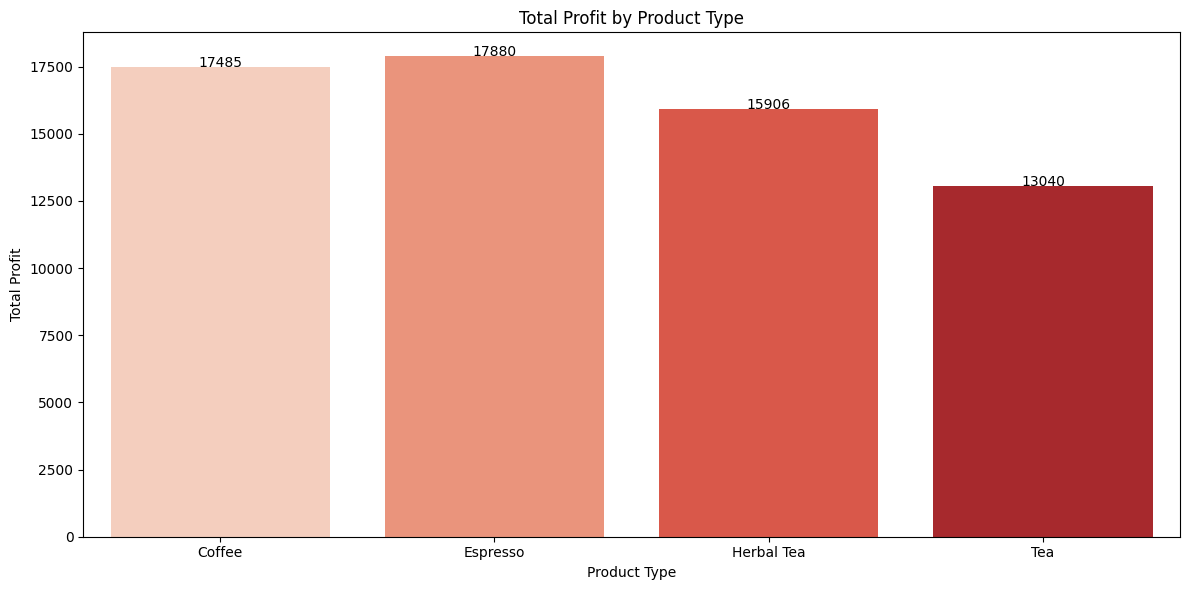

In [16]:
profit_by_product_type = data.groupby('Product_type').Profit.sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=profit_by_product_type, x='Product_type', y='Profit', palette='Reds')

for i, p in enumerate(ax.patches):
    profit = f'{p.get_height():.0f}'
    ax.annotate(profit, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.title("Total Profit by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

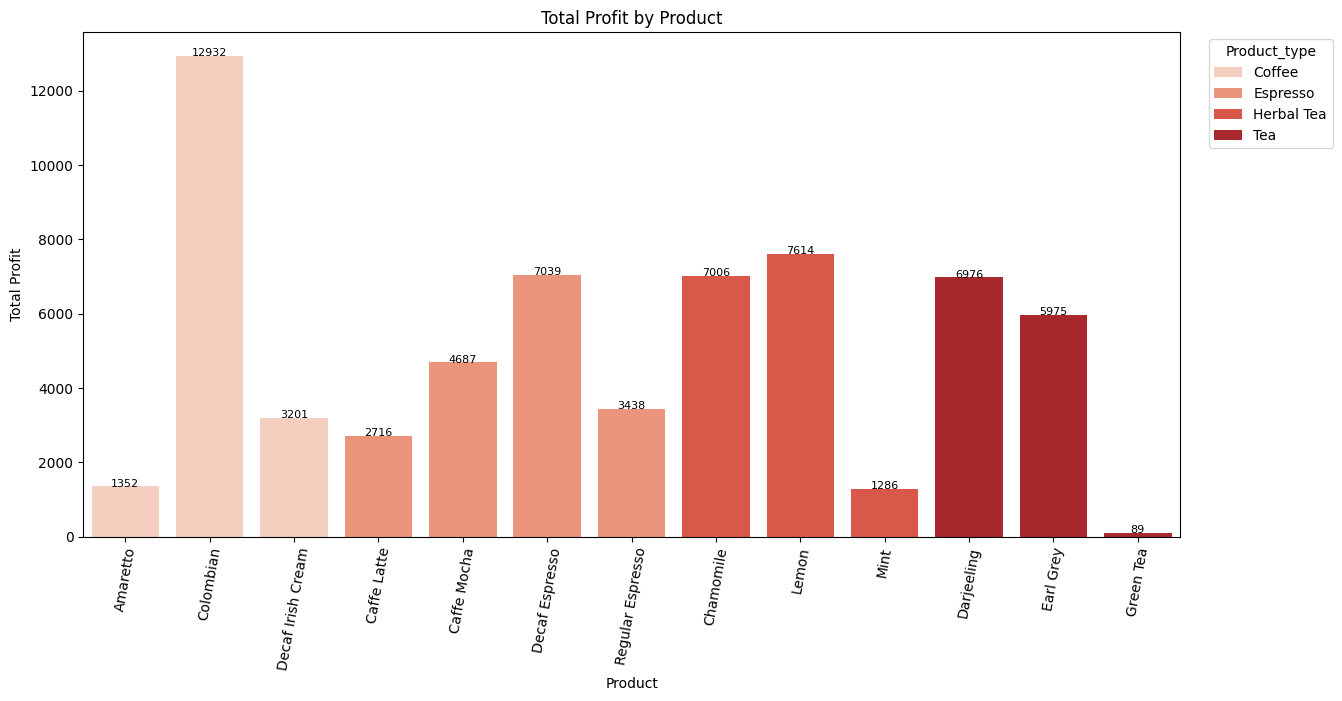

In [17]:
# Profit by product
profit_by_product_by_productType = data.groupby(['Product_type', 'Product']).Profit.sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=profit_by_product_by_productType, x='Product', y='Profit', hue='Product_type', palette='Reds', dodge=False)

for i, p in enumerate(ax.patches):
    profit = f'{p.get_height():.0f}'
    ax.annotate(profit, (p.get_x() + p.get_width() / 2. , p.get_height()), ha='center', va='baseline', fontsize=8, color='black')

plt.title("Total Profit by Product")
plt.xlabel("Product")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.xticks(rotation=80)
ax.legend(title='Product_type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

___
- **Profit by Product Type:**

    - Espresso: Among the product types, Espresso leads in profit with $17,880. Espresso products appear to be a significant contributor to the overall profit.
    - Coffee: Coffee closely follows Espresso with a profit of $17,485. Coffee products also make a substantial contribution to the total profit.
    - Herbal Tea: Herbal Tea generates a notable profit of $15,906, making it the third-highest profit-generating product type.
    - Tea: Tea products contribute with a profit of $13,040, making it the fourth in terms of profit generation among the product types.

- **Profit by Individual Products:**
    - Colombian (Coffee Product): Among Coffee products, Colombian stands out as the most profitable, contributing $12,932 to the total profit. This product appears to be particularly popular among consumers.
    - Decaf Espresso (Espresso Product): Within the Espresso product category, Decaf Espresso is the most profitable, contributing $7,039 to the overall profit.
    - Lemon and Chamomile (Herbal Tea Products): Among Herbal Tea products, Lemon and Chamomile are the most profitable, contributing $7,614 and $7,006, respectively.
    - Darjeeling and Earl Grey (Tea Products): In the Tea product category, Darjeeling and Earl Grey products are the most profitable, with profits of $6,976 and $5,975, respectively.

- **Key Insights:**

    - Espresso and Coffee products are the top profit generators among the product types, indicating a strong demand for caffeinated beverages.
    - Specific products within each category, such as Colombian, Decaf Espresso, Lemon, Chamomile, Darjeeling, and Earl Grey, stand out as the most popular and profitable choices within their respective product types.
    - Consumer preferences appear to vary by product type, with different products attracting higher profits.
___

### 4.4. Profit by Market size and Market
---

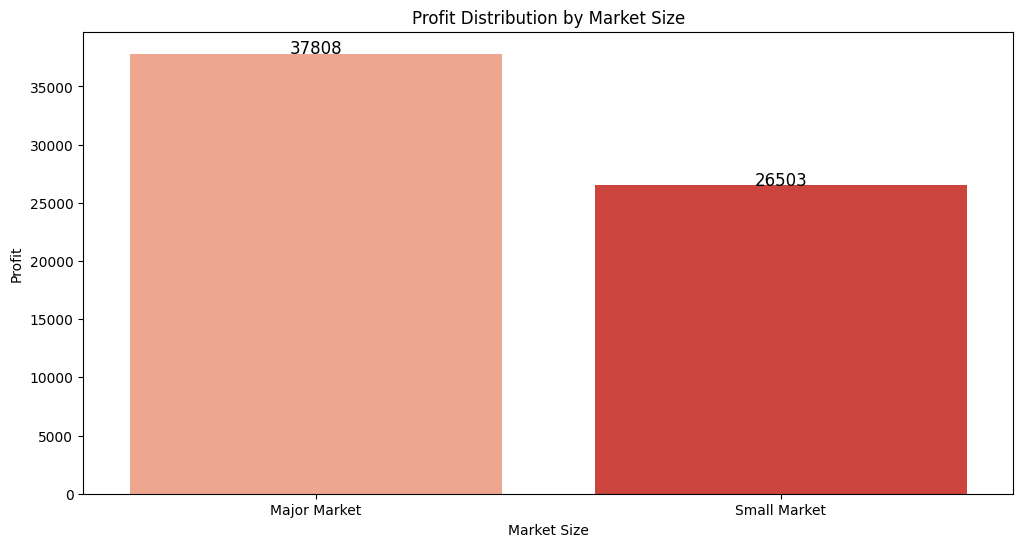

In [18]:
# Profit distribution by market size
total_profit_by_market_size = data.groupby('Market_size')['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_profit_by_market_size, x="Market_size", y="Profit", palette='Reds')
for i, p in enumerate(ax.patches):
    sales = f'{p.get_height():.0f}'
    ax.annotate(sales, (p.get_x() + p.get_width() / 2. , p.get_height()), ha='center', va='baseline', fontsize=12, color='black')

plt.title("Profit Distribution by Market Size")
plt.xlabel("Market Size")
plt.ylabel("Profit")
plt.show()

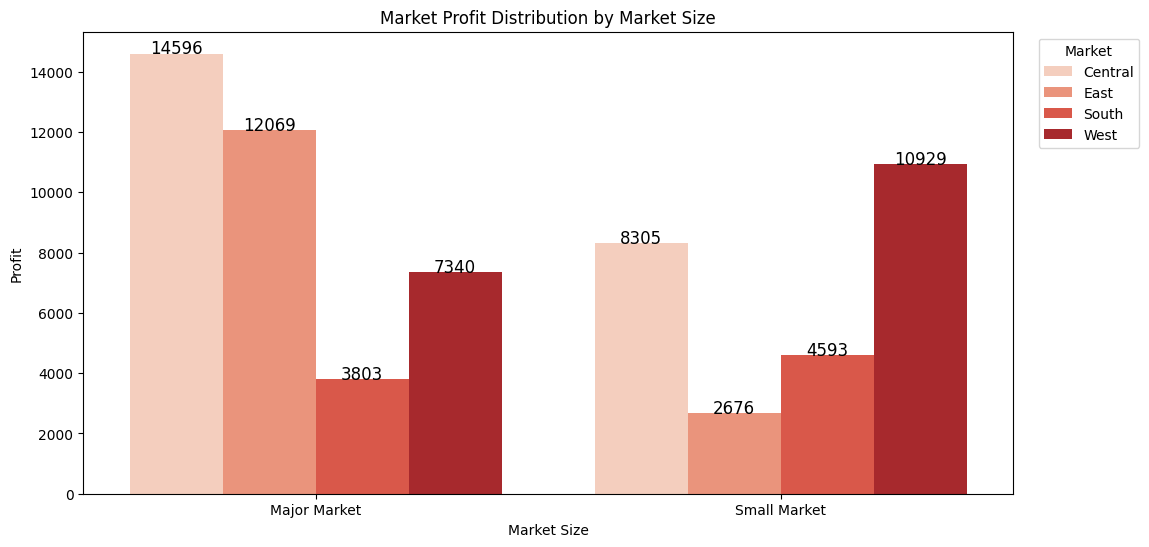

In [47]:
# Market Profit distribution by market size
total_profit_by_market_size = data.groupby(['Market_size', 'Market'])['Profit'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_profit_by_market_size, x="Market_size", y="Profit", palette='Reds', hue='Market')
for i, p in enumerate(ax.patches):
    profit = f'{p.get_height():.0f}'
    ax.annotate(profit, (p.get_x() + p.get_width() / 2. , p.get_height()), ha='center', va='baseline', fontsize=12, color='black')

ax.legend(title='Market', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Market Profit Distribution by Market Size")
plt.xlabel("Market Size")
plt.ylabel("Profit")
plt.show()

In [20]:
# Profit distribution in small market
small_market = data[data['Market_size'] == 'Small Market']
small_market_summary = small_market.groupby(['State', 'Product', 'Market']).Profit.sum().reset_index()

fig = px.bar(small_market_summary, x='State', y='Profit', color='Product', 
             title='Total Profit by Product in Each State (Small Market)', 
             labels={'State': 'State', 'Profit': 'Total Profit'},
             color_discrete_sequence=px.colors.qualitative.Set3,
             facet_col='Market')

fig.update_xaxes(categoryorder='array')
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Total Profit')
fig.update_layout(legend_title_text='Product', xaxis_tickangle=-45)

fig.show()

In [21]:
# Profit distribution in major market
major_market = data[data['Market_size'] == 'Major Market']
major_market_summary = major_market.groupby(['State', 'Product', 'Market']).Profit.sum().reset_index()

fig = px.bar(major_market_summary, x='State', y='Profit', color='Product', 
             title='Total Profit by Product in Each State (Major Market)', 
             labels={'State': 'State', 'Profit': 'Total Profit'},
             color_discrete_sequence=px.colors.qualitative.Set3,
             facet_col='Market')

fig.update_xaxes(categoryorder='array')
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Total Profit')
fig.update_layout(legend_title_text='Product', xaxis_tickangle=-45)

fig.show()

___
- **Market Size Analysis:**

    - Major Market vs. Small Market: The Major Market outperforms the Small Market in terms of profit, with the Major Market generating $37,808 in profit compared to the Small Market's $26,503.
- **Market Analysis:**
    - Major Market Profit: Within the Major Market, Central leads with the highest profit of $14,596, followed by East with $12,069. West and South contribute $7,340 and $3,803, respectively.
- **Small Market Profit:**
    - In the Small Market, West stands out with the highest profit of $10,929, followed by Central with $8,305. South and East contribute profits of $4,593 and $2,676, respectively.
- **Profit by Product and Market:**
    - Nevada (Small Market): In Nevada, specific products like Darjeeling, Lemon, Earl Grey, and Mint are profitable, contributing $1,577, $1,123, $1,078, and $852, respectively. However, Green Tea in Nevada incurs a negative profit of -$2,760. The state of Utah also shows a negative profit of -$74 for Green Tea.
- **Other Negative Profit Products:**
    - Several products across different markets incur negative revenue. For example, Caffe Latte and Decaf Irish Coffee in New Mexico, Lemon and Chamomile in Missouri, and Caffe Mocha and Regular Espresso in New Hampshire all record negative profits.
- **California (Major Market):**
    - California leads in profit within the Major Market, with Colombian generating the highest profit at $1,871. Decaf Espresso follows with $1,585, Lemon with $1,361, and Caffe Latte with $1,080. However, Amaretto and Decaf Irish Cream incur negative profits of -$542 and -$976, respectively.
- **New York (Major Market):**
    - New York contributes to profits in products like Regular Espresso ($2,802), Colombian ($1,873), Lemon ($1,595). Notably, Caffe Mocha incurs a negative profit of -$1,560, and Mint records a negative profit of -$1,279.
- **Key Insights:**

    - The Major Market generates higher profit compared to the Small Market, with a significant contribution from Central and West.
    - Product-specific profit varies across different states, with some products recording negative profits.
___

### 5.1. Marketing Evolution over the Years and Months
___

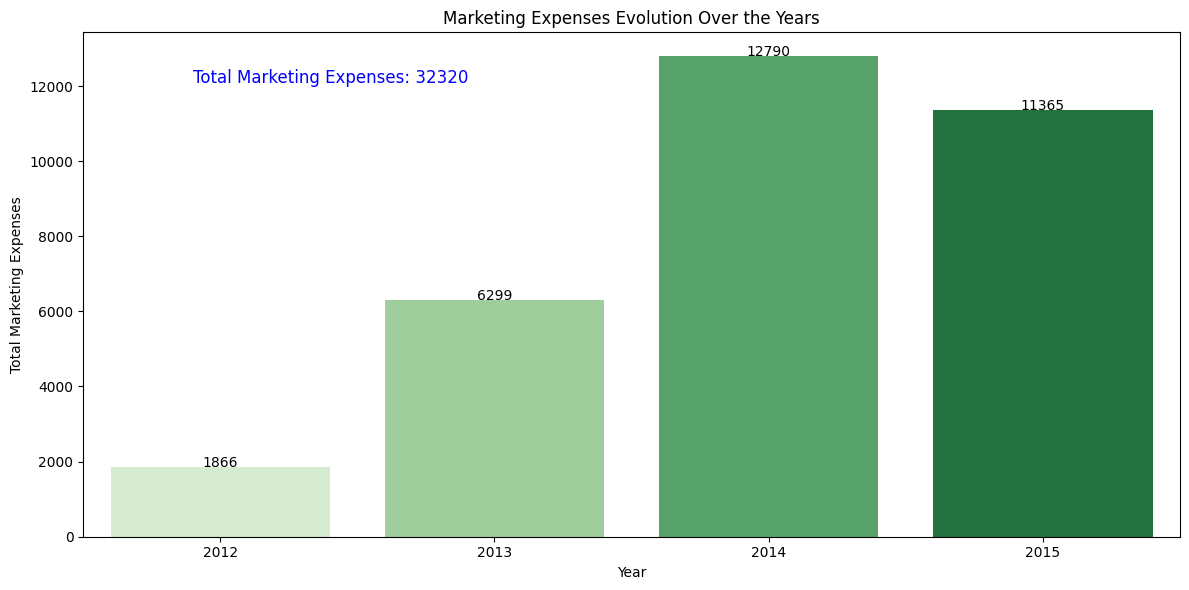

In [22]:
marketing_by_years = data.groupby('Year').Marketing.sum().reset_index()
total_marketing = data['Marketing'].sum()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=marketing_by_years, x='Year', y='Marketing', palette='Greens')

for i, p in enumerate(ax.patches):
    marketing = f'{p.get_height():.0f}'
    ax.annotate(marketing, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.text(0.1, 0.9, f'Total Marketing Expenses: {total_marketing:.0f}', 
         transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.title("Marketing Expenses Evolution Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Marketing Expenses")

plt.tight_layout()
plt.show()

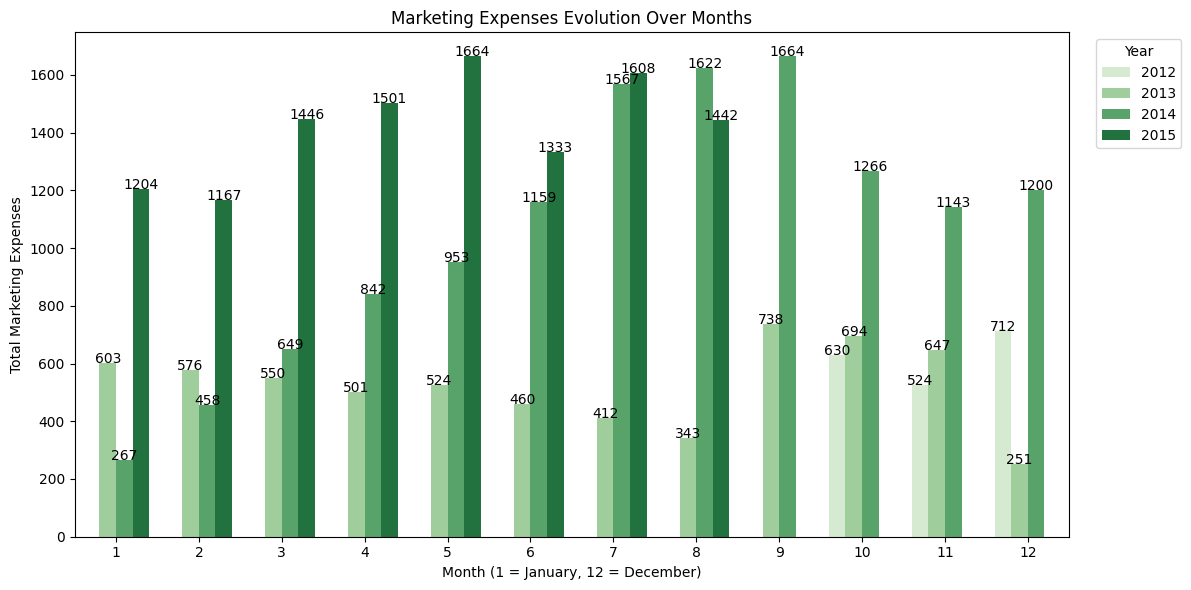

In [23]:
mktg_by_month = data.groupby(['Year', 'Month']).Marketing.sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mktg_by_month, x='Month', y='Marketing', palette='Greens', hue='Year')

for i, p in enumerate(ax.patches):
    percentage = f'{p.get_height():.0f}'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.title("Marketing Expenses Evolution Over Months")
plt.xlabel("Month (1 = January, 12 = December)")
plt.ylabel("Total Marketing Expenses")
ax.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

___
- **Yearly Analysis:**

    - Overall Growth: Over the four-year period, marketing expenses saw a noticeable increase, culminating in a total expenditure of 32,320. This demonstrates that the organization allocated more resources to marketing efforts as the years progressed.
    - Peaks in Spending: The year 2014 stands out as the one with the highest marketing expenses, reaching 12,791, followed closely by 2015 with 11,365. This indicates that these years marked peak periods of investment in marketing initiatives.
- **Monthly Analysis:**
    - 2012: In 2012, the monthly data reveals some interesting trends. Marketing expenses started at 630 in month 10, dropped to 524 in month 11, and increased to 712 in month 12. This shows a fluctuating pattern within the same year.
    - 2013: In 2013, there is a clear reduction in spending over time. Marketing expenses began the year at 603 in month 1, gradually decreased until month 5 (524), experienced a slight increase in month 5, and then decreased until reaching 343 in month 8. However, spending increased again in month 9 to 738 before dropping once more to 251 in month 12. This year displays more erratic fluctuations.
    - 2014: The year 2014 is characterized by consistent growth in marketing expenses. Starting at 267 in month 1, expenses continued to increase over the months, peaking at 1,664 in month 9. Although there were decreases in the following three months, spending remained at higher levels compared to the initial months of the year.
    - 2015: In 2015, marketing expenses started at a higher point compared to the previous years, indicating a more robust marketing strategy. Month 5 emerged as the peak month with the highest expense, reaching 1,664.
- **Key Insights:**

    - The data underscores a clear upward trajectory in marketing expenses over the four years, demonstrating a commitment to investment in marketing activities.
    - The choice of peak years (2014 and 2015) for high marketing spending suggests a strategic focus on specific campaigns or initiatives during those periods.
    - Monthly analysis reveals varied patterns, with some months showing increases and others showing declines, adding complexity to the understanding of marketing expense allocation.
____

### 5.2 Marketing by Product Type and by Product
___

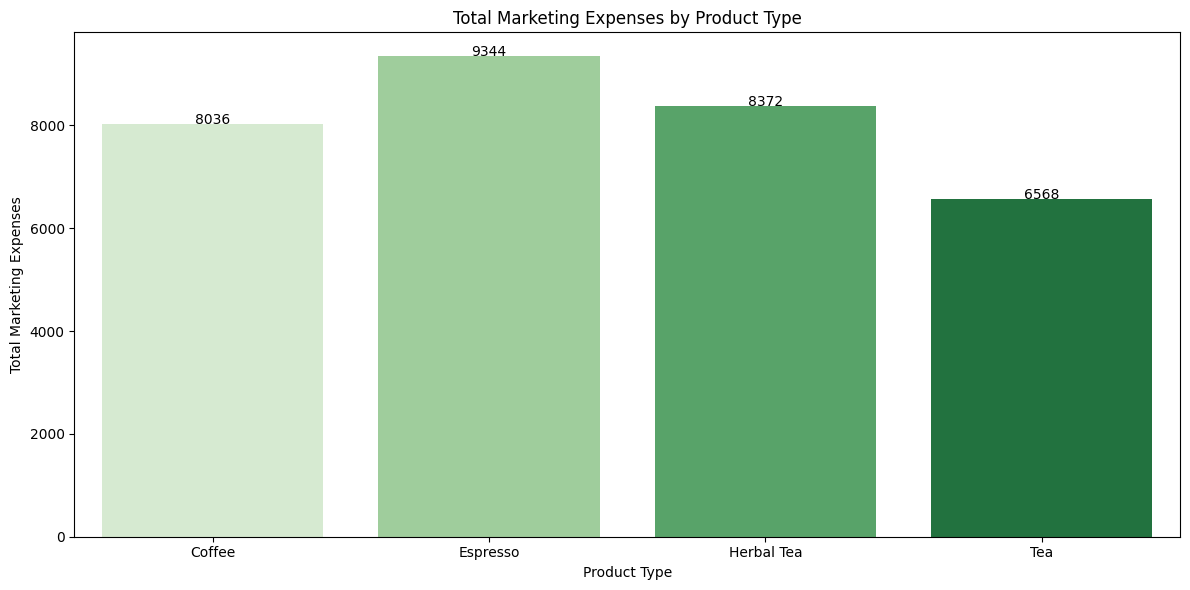

In [24]:
mktg_by_product_type = data.groupby('Product_type').Marketing.sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mktg_by_product_type, x='Product_type', y='Marketing', palette='Greens')

for i, p in enumerate(ax.patches):
    Marketing = f'{p.get_height():.0f}'
    ax.annotate(Marketing, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.title("Total Marketing Expenses by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Total Marketing Expenses")
plt.tight_layout()
plt.show()

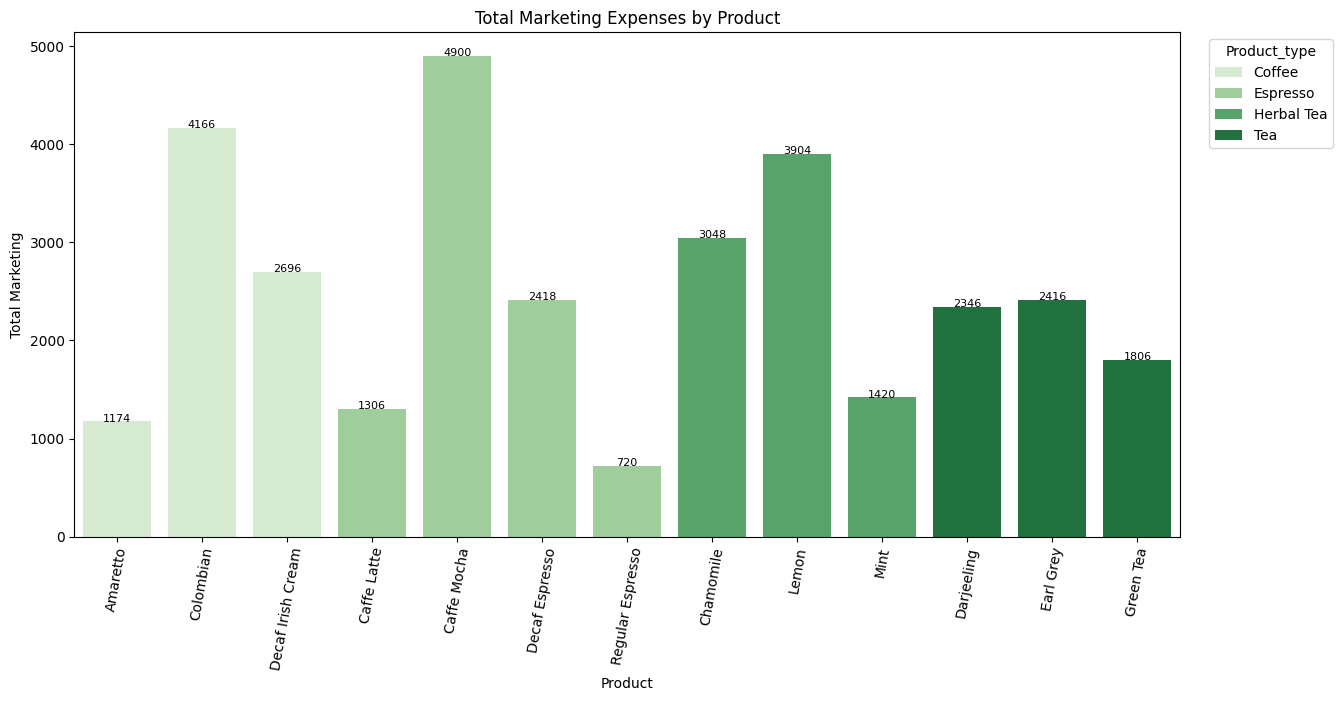

In [25]:
# Marketing by product
mktg_by_product_by_productType = data.groupby(['Product_type', 'Product']).Marketing.sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mktg_by_product_by_productType, x='Product', y='Marketing', hue='Product_type', palette='Greens', dodge=False)

for i, p in enumerate(ax.patches):
    marketing = f'{p.get_height():.0f}'
    ax.annotate(marketing, (p.get_x() + p.get_width() / 2. , p.get_height()), ha='center', va='baseline', fontsize=8, color='black')

plt.title("Total Marketing Expenses by Product")
plt.xlabel("Product")
plt.ylabel("Total Marketing")
plt.tight_layout()
plt.xticks(rotation=80)
ax.legend(title='Product_type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

___
- **Marketing Expenses by Product Type:**
    - Espresso: Marketing expenses for Espresso totaled 9,344, making it the product type with the highest marketing investment. This suggests that the company prioritizes marketing initiatives for Espresso products.
    - Herbal Tea: Herbal Tea followed closely with expenses amounting to 8,373. This is a notable investment and indicates a strategic focus on promoting Herbal Tea products.
    - Coffee: Coffee products received substantial marketing attention with expenses of 8,036. Within the Coffee category, there are further distinctions in spending, which we will discuss below.
    - Tea: Tea products also saw significant marketing expenses, totaling 6,568. While these expenses are lower than Espresso, Herbal Tea, and Coffee, it still represents a considerable investment in Tea-related marketing efforts.
- **Marketing Expenses by Specific Products:**
    - Coffee Products:
        - Colombian: Among Coffee products, Colombian had the highest marketing expenses, reaching 4,166. This suggests that the company may have focused on promoting Colombian Coffee as a flagship product.
        - Decaf Irish Cream: Decaf Irish Cream is the second-highest in terms of marketing expenses within the Coffee category, with 2,696. While not as high as Colombian, it still indicates significant marketing efforts for this product.
    - Espresso Products:
        - Coffee Mocha: Coffee Mocha led the marketing expenses within the Espresso category, with a significant investment of 4,900. This highlights the importance of Coffee Mocha in the Espresso product line.
        - Decaf Espresso: Decaf Espresso followed with marketing expenses of 2,418. While not as high as Coffee Mocha, it still signifies a notable marketing focus on this product.
    - Herbal Tea Products:
        - Lemon and Chamomile: Within the Herbal Tea category, Lemon and Chamomile stood out with the highest expenses, 3,904 and 3,048, respectively. This suggests that these two products were the key focus of marketing efforts in the Herbal Tea product line.
    - Tea Products:
        - Earl Grey and Darjeeling: In the Tea category, Earl Grey and Darjeeling had the most significant expenses, with 2,416 and 2,346, respectively. These numbers indicate a focus on promoting these specific Tea products.
- **Key Insights:**
    - Espresso and Herbal Tea are the dominant product types in terms of marketing expenses, indicating strategic importance.
    - Within the Coffee and Espresso categories, Colombian Coffee and Coffee Mocha had the highest expenses, suggesting they are key products in the marketing strategy.
    - Lemon and Chamomile are the primary focus of marketing in the Herbal Tea category.
    - Earl Grey and Darjeeling are the primary Tea products that receive marketing attention.
___

### 5.3. Marketing by Market size and Market
---

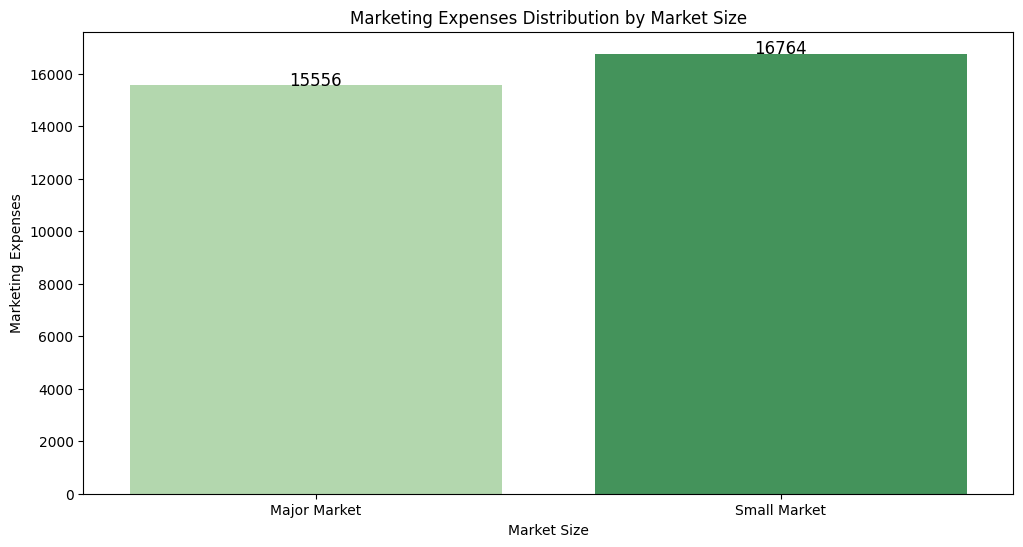

In [26]:
# Marketing distribution by market size
total_mktg_by_market_size = data.groupby('Market_size')['Marketing'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_mktg_by_market_size, x="Market_size", y="Marketing", palette='Greens')
for i, p in enumerate(ax.patches):
    Marketing = f'{p.get_height():.0f}'
    ax.annotate(Marketing, (p.get_x() + p.get_width() / 2. , p.get_height()), ha='center', va='baseline', fontsize=12, color='black')

plt.title("Marketing Expenses Distribution by Market Size")
plt.xlabel("Market Size")
plt.ylabel("Marketing Expenses")
plt.show()

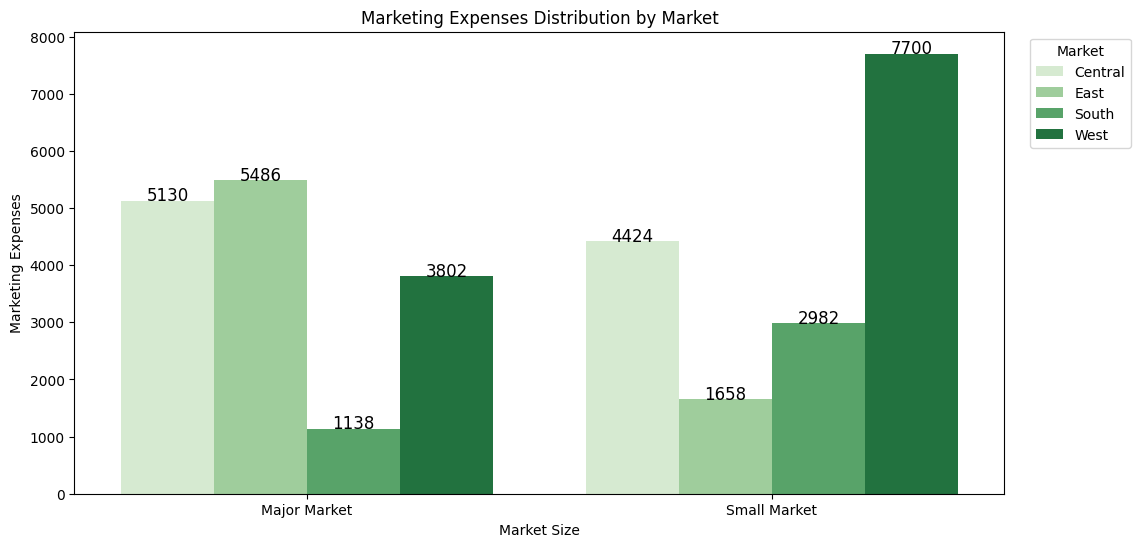

In [27]:
# Marketing distribution by market size
total_mktg_by_market_size = data.groupby(['Market_size', 'Market'])['Marketing'].sum().reset_index()
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_mktg_by_market_size, x="Market_size", y="Marketing", palette='Greens', hue='Market')
for i, p in enumerate(ax.patches):
    profit = f'{p.get_height():.0f}'
    ax.annotate(profit, (p.get_x() + p.get_width() / 2. , p.get_height()), ha='center', va='baseline', fontsize=12, color='black')

ax.legend(title='Market', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Marketing Expenses Distribution by Market")
plt.xlabel("Market Size")
plt.ylabel("Marketing Expenses")
plt.show()

In [28]:
# Marketing distribution in small market
small_market = data[data['Market_size'] == 'Small Market']
small_market_summary = small_market.groupby(['State', 'Product', 'Market']).Marketing.sum().reset_index()

fig = px.bar(small_market_summary, x='State', y='Marketing', color='Product', 
             title='Total Marketing Expenses by Product in Each State (Small Market)', 
             labels={'State': 'State', 'Marketing': 'Total Marketing Expenses'},
             color_discrete_sequence=px.colors.qualitative.Set3,
             facet_col='Market')

fig.update_xaxes(categoryorder='array')
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Total Marketing Expenses')
fig.update_layout(legend_title_text='Product', xaxis_tickangle=-45)

fig.show()

In [29]:
# Marketing distribution in major market
major_market = data[data['Market_size'] == 'Major Market']
major_market_summary = major_market.groupby(['State', 'Product', 'Market']).Marketing.sum().reset_index()

fig = px.bar(major_market_summary, x='State', y='Marketing', color='Product', 
             title='Total Marketing Expenses by Product in Each State (Major Market)', 
             labels={'State': 'State', 'Profit': 'Total Marketing Expenses'},
             color_discrete_sequence=px.colors.qualitative.Set3,
             facet_col='Market')

fig.update_xaxes(categoryorder='array')
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Total Marketing Expenses')
fig.update_layout(legend_title_text='Product', xaxis_tickangle=-45)

fig.show()

___
- **Marketing Expenses by Market Size:**
    - In the small market, marketing expenses were concentrated, totaling $16,764.
    - In the major market, expenses were slightly lower, at $15,556.
- **Expenses by Market in Small Market:**
    - Among the regions within the small market, West stood out with the highest marketing expenses at $7,700.
    - The Central region followed with $4,424, the South with $2,982, and the East with $1,658.
- **Expenses by Market in Major Market:**
    - Within the major market, the East region had the highest marketing expenses, totaling $5,486.
    - Central followed with $5,130, West with $3,802, and South with $1,138.
- **Products with Major Marketing Effort in Small Market:**
    - In the small market, the West region concentrated its marketing efforts on several products:
        - Nevada with Chamomile ($688)
        - Green Tea ($600)
        - Darjeeling ($480)
        - Earl Grey ($390)
        -Lemon ($360)
- **Products with Major Marketing Effort in Small Market - West Region:**
    - In the West region of the small market, additional focus was observed in Washington, with the primary emphasis on:
        - Decaf Iris Cream ($534)
        - Green Tea ($316)
- **Products with Major Marketing Effort in Small Market - South Region:**
    - In the South region (Oklahoma) of the small market, the primary focus was on Lemon ($534).
- **Products with Major Marketing Effort in Small Market - Central Region:**
    - In the Central region of the small market, marketing expenses were concentrated on:
        - Colombian ($534)
        - Earl Grey ($316) in Wisconsin
        - Earl Grey ($600), Chamomile ($480), and Darjeeling ($390) in Iowa.
- **Products with Major Marketing Effort in Major Market:**
    - In the major market, different regions concentrated their marketing efforts on specific products:
        - In the West region (California):
            - Caffe Mocha ($688)
            - Colombian ($550)
            - Decaf Espresso ($480)
            - Lemon ($434)
            - Decaf Iris Cream ($360)
        - In the Central region (Illinois):
            - Caffe Mocha ($480)
            - Decaf Espresso ($390)
            - Colombian ($360)
        - In the East region (New York):
            - Caffe Mocha ($688)
            - Lemon ($600)
            - Colombian ($550)
            - Mint ($434)
            - Regular Espresso ($390)
        - In the South region (Texas):
            - Colombian ($434)
- **key insights:**
    - The small market had higher overall marketing expenses compared to the major market.
    - Marketing expenses within each market were not evenly distributed, with specific regions concentrating efforts on particular products.
    - Certain products received more marketing attention than others, with Caffe Mocha, Colombian, and Lemon being common focus areas across different regions.
    - The West region in both the small and major markets had a substantial marketing budget, primarily focusing on a range of products.
___ 

### 5.4. Marketing - Sales
___

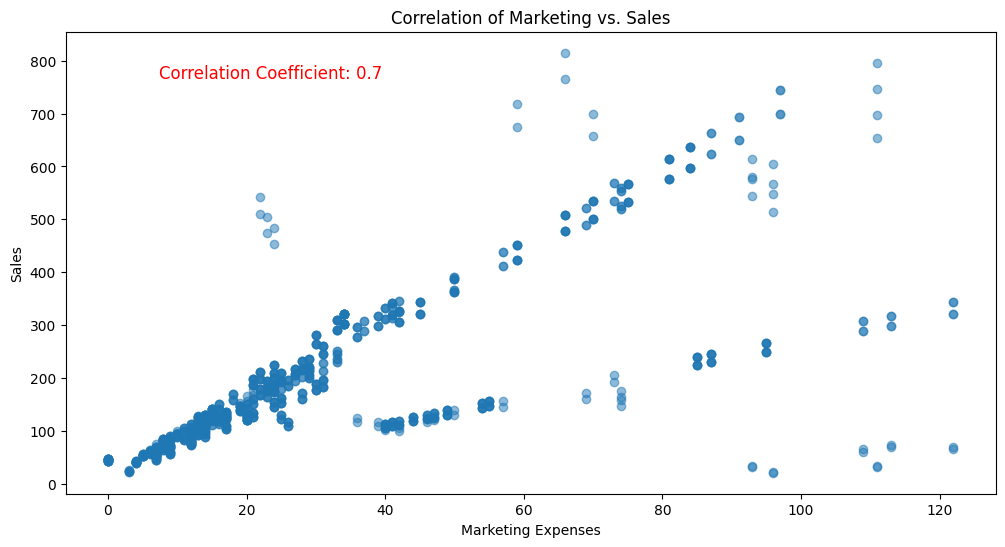

In [38]:
subset_data = data[['Marketing', 'Sales']]
# Correlation between both variables
correlation_coeff = subset_data.Marketing.corr(subset_data.Sales)

plt.figure(figsize=(12, 6))
plt.scatter(subset_data.Marketing, subset_data.Sales, alpha=0.5)
plt.title('Correlation of Marketing vs. Sales')
plt.xlabel('Marketing Expenses')
plt.ylabel('Sales')
plt.text(0.1, 0.9, f'Correlation Coefficient: {correlation_coeff:.1f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red')
plt.show()

In [39]:
model = LinearRegression()
X = subset_data[['Marketing']]
y = subset_data['Sales']
model.fit(X, y)
print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Slope (b1): {model.coef_[0]:.2f}")

Intercept (b0): 68.19
Slope (b1): 4.04


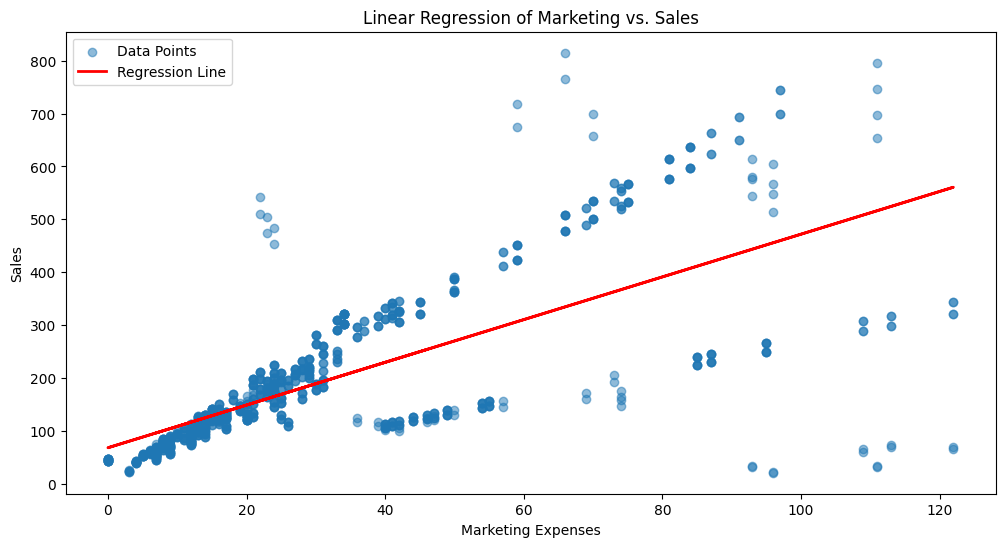

In [40]:
plt.figure(figsize=(12, 6))
plt.scatter(subset_data.Marketing, subset_data.Sales, alpha=0.5, label='Data Points')
plt.plot(subset_data.Marketing, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression of Marketing vs. Sales')
plt.xlabel('Marketing Expenses')
plt.ylabel('Sales')
plt.legend()
plt.show()

___
### 5.5. Marketing - Profit
___

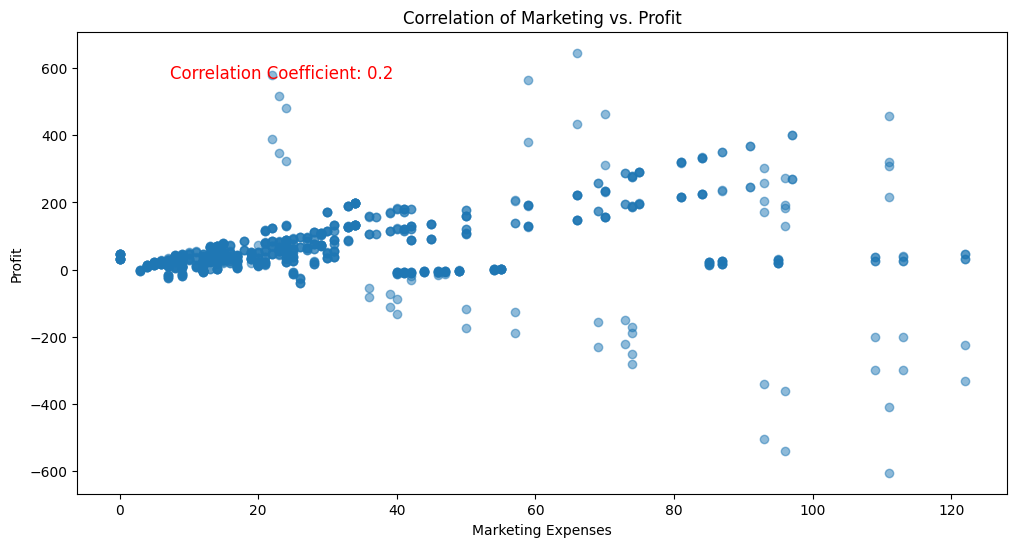

In [43]:
subset_data = data[['Marketing', 'Profit']]
# Correlation between both variables
correlation_coeff = subset_data.Marketing.corr(subset_data.Profit)

plt.figure(figsize=(12, 6))
plt.scatter(subset_data.Marketing, subset_data.Profit, alpha=0.5)
plt.title('Correlation of Marketing vs. Profit')
plt.xlabel('Marketing Expenses')
plt.ylabel('Profit')
plt.text(0.1, 0.9, f'Correlation Coefficient: {correlation_coeff:.1f}', 
         transform=plt.gca().transAxes, fontsize=12, color='red')
plt.show()

In [44]:
X = subset_data[['Marketing']]
y = subset_data['Profit']
model.fit(X, y)
print(f"Intercept (b0): {model.intercept_:.2f}")
print(f"Slope (b1): {model.coef_[0]:.2f}")

Intercept (b0): 34.48
Slope (b1): 0.86


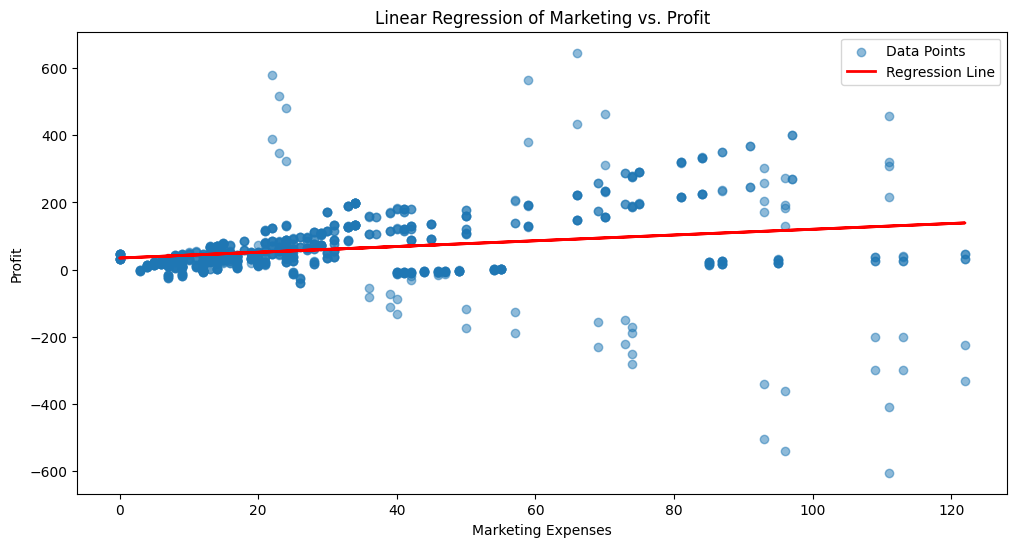

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(subset_data.Marketing, subset_data.Profit, alpha=0.5, label='Data Points')
plt.plot(subset_data.Marketing, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression of Marketing vs. Profit')
plt.xlabel('Marketing Expenses')
plt.ylabel('Profit')
plt.legend()
plt.show()

___
- **Marketing vs. Sales:**
    - The correlation coefficient (r) between marketing and sales is 0.77.
        - This indicates a strong positive linear relationship between marketing expenses and sales. The positive sign (0.77) suggests that as marketing expenses increase, sales tend to increase as well. It's a strong positive correlation, which means that there's a relatively high degree of linear association between the two variables.
    - The linear regression results for this relationship are:
        - Intercept (b0): 68.19
        - Slope (b1): 4.04
        - The intercept (b0) represents the predicted value of sales when marketing expenses are zero. In this case, it's 68.19. This implies that even without any marketing expenses, there is a baseline level of sales.
        - The slope (b1) represents the change in sales for a one-unit change in marketing expenses. Here, it's 4.04, which means that for every additional unit of marketing expenses, sales are expected to increase by 4.04 units.
- **Marketing vs. Profit:**
    - The correlation coefficient (r) between marketing and profit is 0.20.
        - This suggests a weak positive linear relationship between marketing expenses and profit. The positive sign (0.20) indicates that as marketing expenses increase, profit tends to increase as well, but the relationship is not as strong as the one observed between marketing and sales.
    - The linear regression results for this relationship are:
        - Intercept (b0): 34.48
        - Slope (b1): 0.86
        - The intercept (b0) represents the predicted value of profit when marketing expenses are zero. In this case, it's 34.48. It implies that even without any marketing expenses, there is a baseline level of profit.
        - The slope (b1) represents the change in profit for a one-unit change in marketing expenses. Here, it's 0.86, which means that for every additional unit of marketing expenses, profit is expected to increase by 0.86 units.
- *Analysis:*
    - In the marketing vs. sales relationship, the strong positive correlation (0.77) and a relatively high slope (4.04) indicate that an increase in marketing expenses is associated with a significant increase in sales. This suggests that the company's marketing efforts have a substantial impact on its sales performance. The positive intercept (68.19) indicates that even with no marketing expenses, there's still some baseline level of sales.
    - In the marketing vs. profit relationship, the weaker positive correlation (0.20) and the lower slope (0.86) suggest that while there is a positive relationship between marketing expenses and profit, the impact is not as pronounced as in the marketing vs. sales relationship. The positive intercept (34.48) indicates a baseline profit level, even with no marketing expenses.
    - Overall, these analyses provide valuable insights for decision-making. A strong marketing-sales relationship implies that increasing marketing efforts may lead to substantial sales growth. However, the marketing-profit relationship is weaker, suggesting that increasing marketing expenses may not have as direct or significant an impact on profit.
___

### 5.6. ROI
___

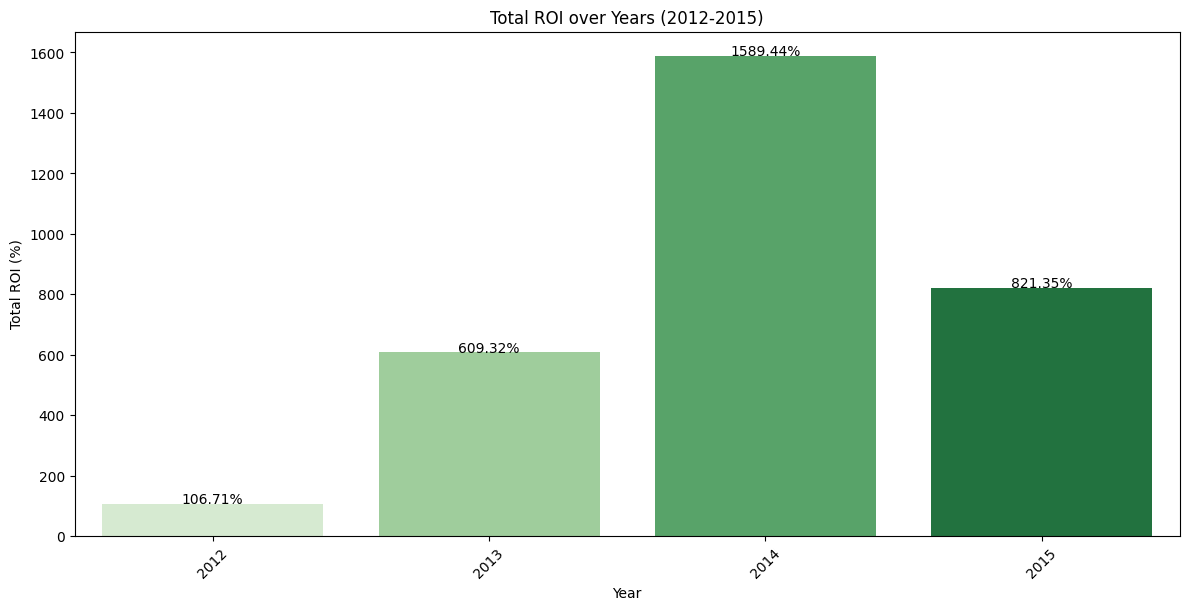

In [62]:
# Calculate total marketing expenses, profit, and sales by year and month
total_mktg_expenses = data.groupby(['Year', 'Month'])['Marketing'].sum().reset_index()
total_profit = data.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
total_sales = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Merge the dataframes to calculate ROI
roi_df = pd.merge(total_mktg_expenses, total_profit, on=['Year', 'Month'])
roi_df = pd.merge(roi_df, total_sales, on=['Year', 'Month'])

# Calculate ROI as a percentage
roi_df['ROI'] = ((roi_df['Profit'] - roi_df['Marketing']) / roi_df['Marketing']) * 100

# Calculate total ROI
total_roi = roi_df.groupby('Year')['ROI'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_roi, x='Year', y='ROI', palette='Greens')
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black')

plt.title("Total ROI over Years (2012-2015)")
plt.xlabel("Year")
plt.ylabel("Total ROI (%)")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

___
- **Yearly ROI Analysis:**
    - In 2012, the ROI was 106.76%. This means that for every dollar invested, there was a profit of $1.0676, or a 6.76% return on investment.
    - In 2013, the ROI significantly increased to 609.32%, indicating a substantial improvement in investment profitability compared to 2012.
    - In 2014, the ROI further increased to an impressive 1589.44%, signifying a substantial leap in investment returns.
    - In 2015, the ROI was 821.35%, which is slightly lower than the ROI in 2014 but still very high, indicating a strong return on investments.
- **Interpretation:**
    - The increasing trend in ROI from 2012 to 2014 suggests that investments or marketing efforts became more profitable over these years.
    - The ROI in 2013 saw a significant jump, indicating a particularly successful year in terms of generating returns on investments.
    - While there was a decrease in ROI in 2015 compared to 2014, it's still a highly positive figure, indicating that investments continued to be profitable.
- **Implications:**
    - High ROIs suggest that the company's investments or marketing strategies were effective and generated substantial profits relative to the initial investment.
    - The company may have implemented successful marketing campaigns or made strategic financial decisions that resulted in high returns.
*the analysis indicates that the company experienced a significant increase in ROI over the years, with 2014 being the most successful year in terms of generating returns on investments. The consistently high ROI figures suggest that the company's financial and marketing strategies have been effective and profitable.*
___

### 6.1. Target COGS (Cost of Goods Sold) Evolution over the Years
___

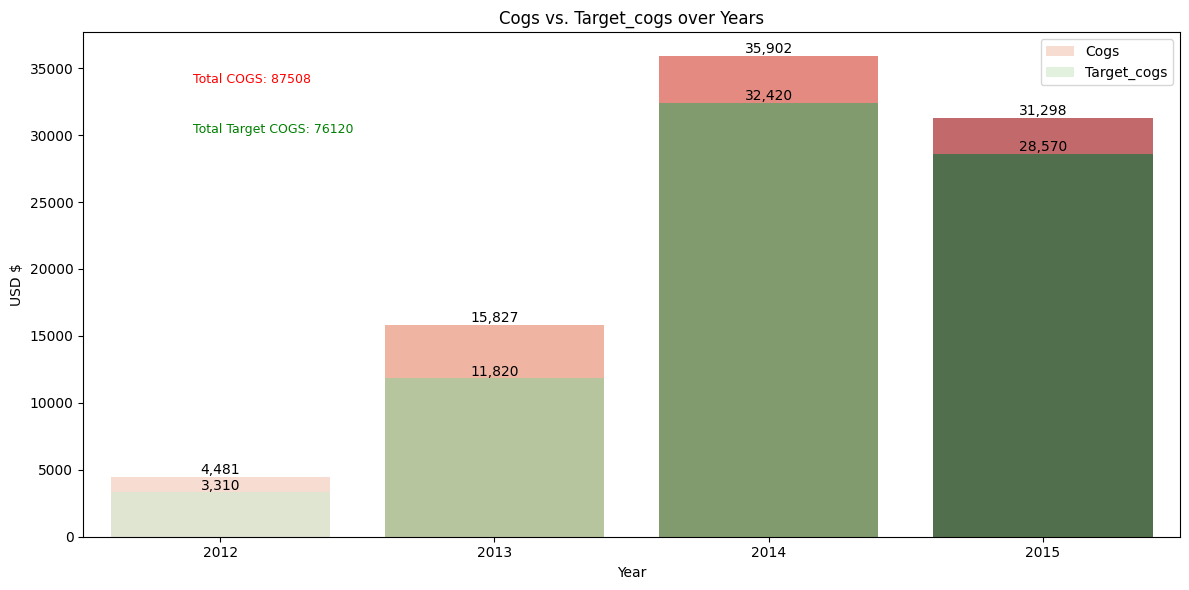

In [30]:
cogs_sum = data.groupby('Year').Cogs.sum().reset_index()
target_cogs_sum = data.groupby('Year').Target_cogs.sum().reset_index()
total_COGS = data['Cogs'].sum()
total_target_COGS = data['Target_cogs'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(data=cogs_sum, x='Year', y='Cogs', label='Cogs', alpha=0.7, palette='Reds')
sns.barplot(data=target_cogs_sum, x='Year', y='Target_cogs', label='Target_cogs', alpha=0.7, palette='Greens')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='top',
                        fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
    
plt.text(0.1, 0.9, f'Total COGS: {total_COGS:.0f}', 
         transform=plt.gca().transAxes, fontsize=9, color='red')

plt.text(0.1, 0.8, f'Total Target COGS: {total_target_COGS:.0f}', 
         transform=plt.gca().transAxes, fontsize=9, color='green')

plt.title('Cogs vs. Target_cogs over Years')
plt.xlabel('Year')
plt.ylabel('USD $')
plt.legend()

plt.tight_layout()

plt.show()

___
### 6.2. Margin and Target Marging Evolution over the Years
___

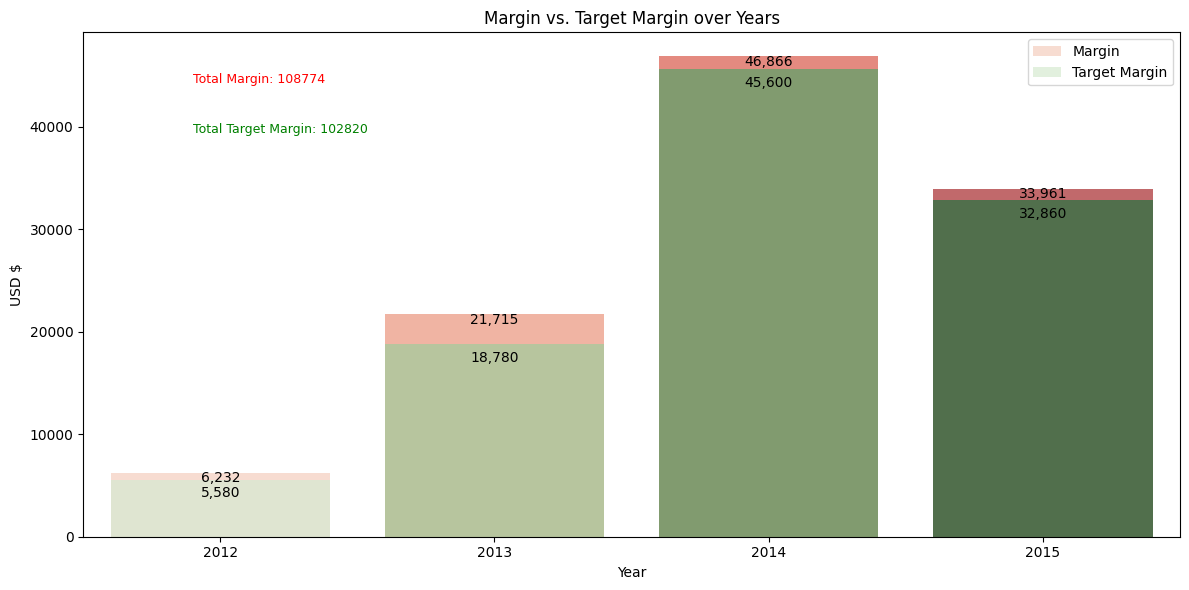

In [31]:
margin_sum = data.groupby('Year').Margin.sum().reset_index()
target_margin_sum = data.groupby('Year').Target_margin.sum().reset_index()
total_margin = data['Margin'].sum()
total_target_margin = data['Target_margin'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(data=margin_sum, x='Year', y='Margin', label='Margin', alpha=0.7, palette='Reds')
sns.barplot(data=target_margin_sum, x='Year', y='Target_margin', label='Target Margin', alpha=0.7, palette='Greens')

for p1, p2 in zip(plt.gca().patches[:len(margin_sum)], plt.gca().patches[len(margin_sum):]):
    plt.gca().annotate(f'{int(p1.get_height()):,}', (p1.get_x() + p1.get_width() / 2., p1.get_height()), ha='center', va='top',
                      fontsize=10, color='black', xytext=(0, 1), textcoords='offset points')
    plt.gca().annotate(f'{int(p2.get_height()):,}', (p2.get_x() + p2.get_width() / 2., p2.get_height()), ha='center', va='top',
                      fontsize=10, color='black', xytext=(0, -5), textcoords='offset points')

plt.text(0.1, 0.9, f'Total Margin: {total_margin:.0f}', 
         transform=plt.gca().transAxes, fontsize=9, color='red')

plt.text(0.1, 0.8, f'Total Target Margin: {total_target_margin:.0f}', 
         transform=plt.gca().transAxes, fontsize=9, color='green')

plt.title('Margin vs. Target Margin over Years')
plt.xlabel('Year')
plt.ylabel('USD $')
plt.legend()

plt.tight_layout()

plt.show()

___
### 6.3. Profit and Target Profit Evolution over the Years
___

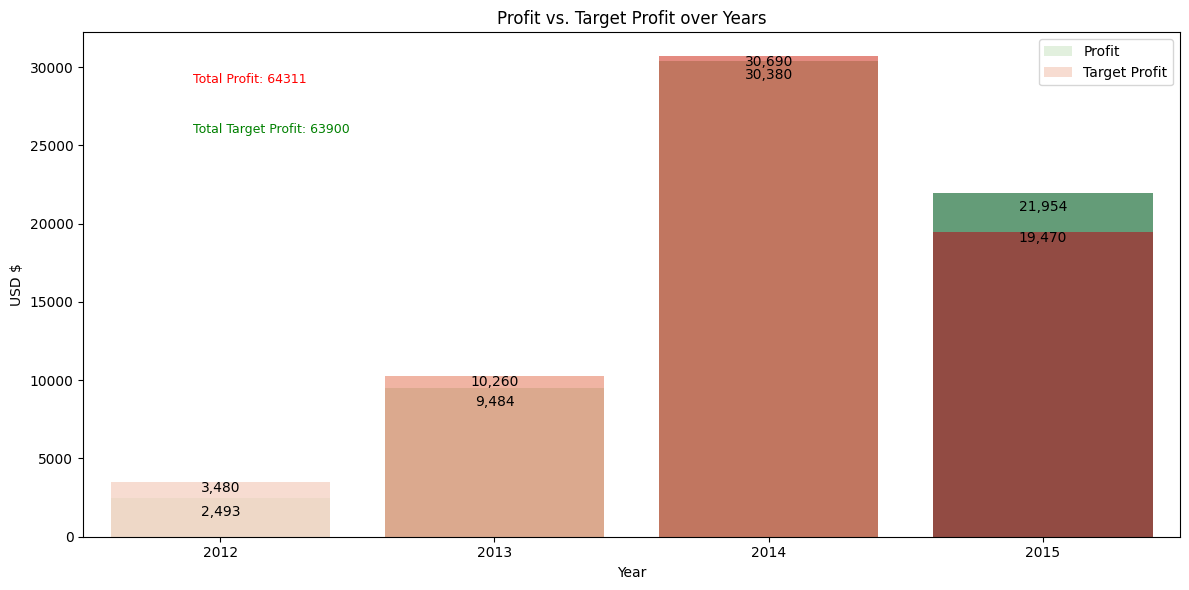

In [32]:
profit_sum = data.groupby('Year').Profit.sum().reset_index()
target_profit_sum = data.groupby('Year').Target_profit.sum().reset_index()
total_profit_sum = data['Profit'].sum()
total_target_profit_sum = data['Target_profit'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(data=profit_sum, x='Year', y='Profit', label='Profit', alpha=0.7, palette='Greens')
sns.barplot(data=target_profit_sum, x='Year', y='Target_profit', label='Target Profit', alpha=0.7, palette='Reds')

for p1, p2 in zip(plt.gca().patches[:len(profit_sum)], plt.gca().patches[len(profit_sum):]):
    plt.gca().annotate(f'{int(p1.get_height()):,}', (p1.get_x() + p1.get_width() / 2., p1.get_height()), ha='center', va='top',
                      fontsize=10, color='black', xytext=(0, -5), textcoords='offset points')
    plt.gca().annotate(f'{int(p2.get_height()):,}', (p2.get_x() + p2.get_width() / 2., p2.get_height()), ha='center', va='top',
                      fontsize=10, color='black', xytext=(0, 1), textcoords='offset points')

plt.text(0.1, 0.9, f'Total Profit: {total_profit_sum:.0f}', 
         transform=plt.gca().transAxes, fontsize=9, color='red')

plt.text(0.1, 0.8, f'Total Target Profit: {total_target_profit_sum:.0f}', 
         transform=plt.gca().transAxes, fontsize=9, color='green')

plt.title('Profit vs. Target Profit over Years')
plt.xlabel('Year')
plt.ylabel('USD $')
plt.legend()

plt.tight_layout()

plt.show()

___
- **Cost Of Goods Sold (COGS):**
    - The total COGS for the years 2012 to 2015 was $87,508.
    - The total target COGS for the same period was $76,120.
- **Year-wise details:**
    - In 2012, COGS was $4,481, and the target COGS was $3,310.
    - In 2013, COGS increased to $15,827, with a target COGS of $11,820.
    - In 2014, COGS significantly increased to $35,902, while the target COGS was $32,420.
    - In 2015, COGS decreased slightly to $31,298, and the target COGS was $28,570.
- **Margin:**
    - The total margin for the years 2012 to 2015 was $108,774.
    - The total target margin for the same period was $102,820.
- **Year-wise details:**
    - In 2012, the margin was $6,232, and the target margin was $5,580.
    - In 2013, the margin increased to $21,715, with a target margin of $18,780.
    - In 2014, the margin reached $46,866, and the target margin was $45,600.
    - In 2015, the margin decreased to $33,961, while the target margin was $32,860.
- **Profit:**
    - The total profit for the years 2012 to 2015 was $64,311.
    - The total target profit for the same period was $63,900.
- **Year-wise details:**
    - In 2012, the profit was $2,493, and the target profit was $3,480.
    - In 2013, the profit increased to $9,484, with a target profit of $10,260.
    - In 2014, the profit further increased to $30,380, while the target profit was $30,690.
    - In 2015, the profit was $21,954, and the target profit was $19,470.
- **Analysis:**
    - The company experienced variations in COGS, margin, and profit over the four-year period.
    - COGS showed some fluctuations, with the highest COGS in 2014 and the lowest in 2012.
    - Margin increased over the years, peaking in 2014, and then slightly decreased in 2015.
    - Profit also showed an increasing trend, except for a decrease in 2015.
___

## Conclusion:
- **Sales Analysis:**
    - Total sales for the period were 202,895 units, showing an upward trend over the years.
    - 2014 recorded the highest sales at 84,982 units, followed closely by 2015 with 68,154 units.
    - Specific monthly trends and variations in sales were observed over the years.
- **Product Categories:**
    - Espresso was the top-selling category with 56,013 units, closely followed by Coffee (52,373 units), Herbal Tea (51,683 units), and Tea (42,824 units).
    - Product-specific analysis revealed the most popular products within each category.
- **Market Size and Segment Analysis:**
    - The Major Market outperformed the Small Market in terms of profit.
    - Within the Small Market, the West market led with significant sales.
    - The Major Market was dominated by the Central and East markets.
    - Different states exhibited varying product preferences and profitability.
- **Profit Analysis:**
    - The total profit for the analyzed period was $64,311.
    - 2014 and 2015 were the most profitable years.
    - Monthly profit analysis showed variations and trends, with higher profits in the latter months of the year.
- **Marketing Expenses:**
    - Over the four-year period, marketing expenses showed an upward trajectory, reaching a total of 32,320.
    - 2014 and 2015 were the peak years for marketing spending.
    - Monthly analysis revealed fluctuations and different patterns of spending.
- **Marketing by Product and Market:**
    - Espresso and Herbal Tea were the dominant product types in marketing expenses.
    - Specific products received more marketing attention within each category.
    - Market analysis showed variations in expenses by region.
- **ROI Analysis:**
    - The Return on Investment (ROI) analysis demonstrated an increasing trend over the years, with 2014 being the most successful year.
    - The consistently high ROI figures suggest that the company's financial and marketing strategies have been effective and profitable.
- **Overall Implications:**
    - The company's marketing efforts have a strong positive correlation with sales, indicating that increased marketing expenses are associated with higher sales.
    - Understanding customer preferences for specific products within each category is crucial for marketing and inventory decisions.
    - Regional variations in product preferences should guide marketing strategies and inventory management.
    - High ROI figures indicate that the company's investments and marketing campaigns have been successful in generating profits.

*In conclusion, the analysis provides a comprehensive view of the company's performance over the four-year period, offering valuable insights for decision-making. It highlights the importance of understanding customer preferences, optimizing marketing strategies, and adapting to regional variations to maximize sales and profitability. The increasing ROI trend underscores the company's effective financial and marketing strategies, contributing to its overall success.*
___